In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
import os
print(os.getcwd())
print(os.listdir())



c:\Users\Dell\MASTER COURSES\Machine Learning 2\Forest-Cover-Prediction
['.git', 'Data', 'Exploration.ipynb', 'README.md', 'submissions']


In [5]:
df = pd.read_csv("Data/train.csv")
print(df.shape)
df.head()

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df_test = pd.read_csv("Data/test-full.csv")
print(df_test.shape)
df_test.head()

(581012, 55)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\pandas\summary_pandas.py:80: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  args = [(name, series) for name, series in df.iteritems()]
c:\Users\Dell\anaconda3\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

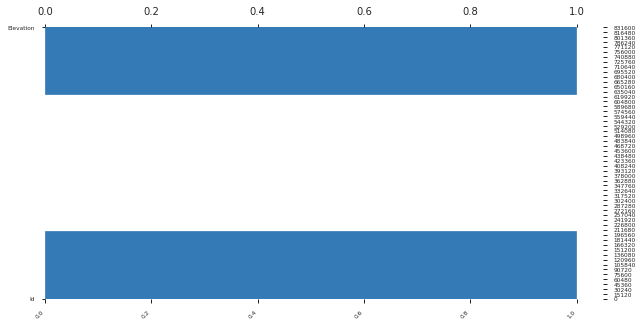

In [71]:
#Pandas Profiling
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file("pandas_profiling.html")

In [10]:
#Check for missing values
df.columns[df.isna().any()]

Index([], dtype='object')

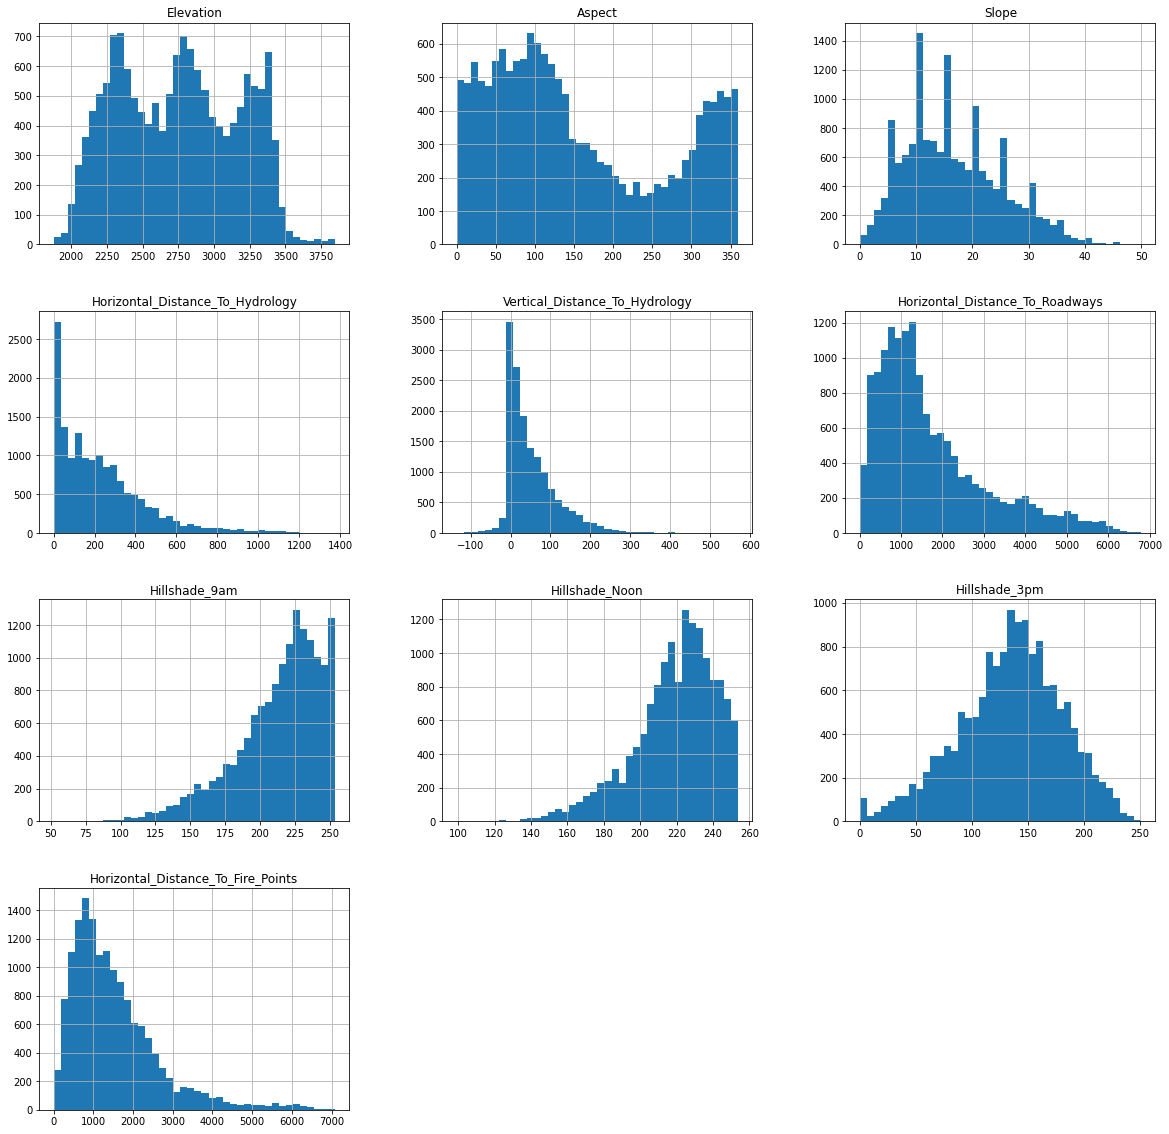

In [101]:
df.iloc[:,1:11].hist(figsize=(20,20), bins=40);

Some anomalies:
- Hillshade 3pm unusually high at zero
- Hillhade 9am is very dense at max value. Is there a cap to the values?
- Slope has a few unusually high values

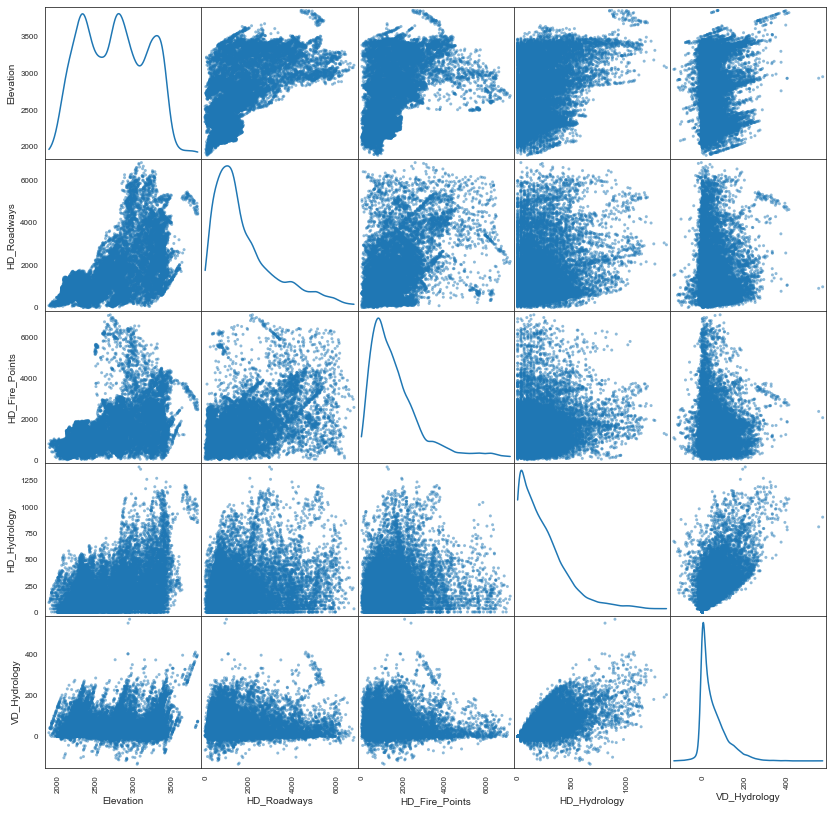

In [108]:
from pandas.plotting import scatter_matrix
with sns.axes_style('white'): 
    smaller_frame=df[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']] 
    smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Horizontal_Distance_To','HD')) 
    smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Vertical_Distance_To','VD')) 
    scatter_matrix(smaller_frame, figsize=(14, 14), diagonal="kde") 
    plt.show()

### Hillshades

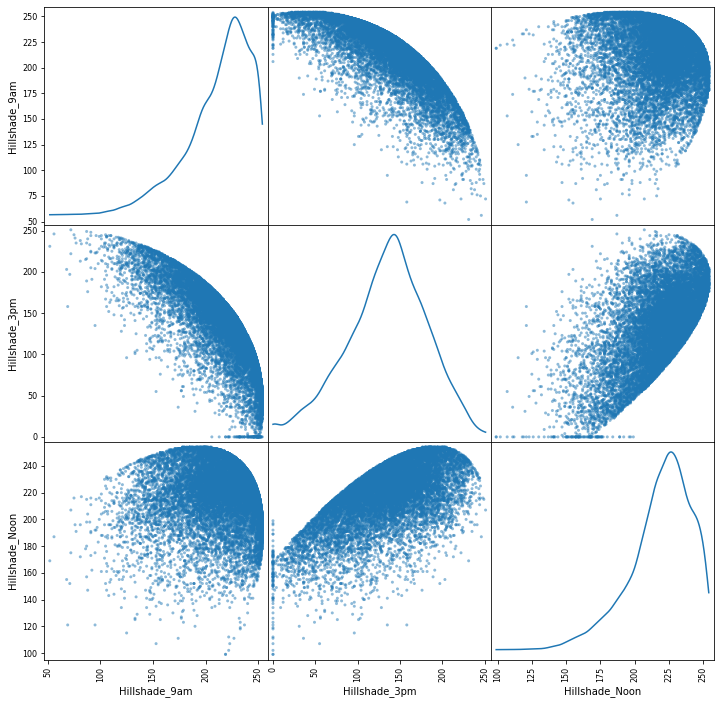

In [144]:
scatter_matrix(df[["Hillshade_9am", "Hillshade_3pm", "Hillshade_Noon"]], 
                figsize=(12,12), diagonal="kde");


In [ ]:
# There are so

## Features Exploration

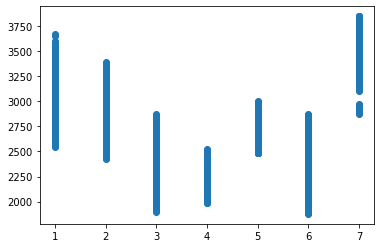

In [113]:
#Elevation
#indeed, 4 has lowets elevation and7 has highest on average
plt.scatter(y=df.Elevation, x=df.Cover_Type)

### Group target by soil type


In [31]:
def aggregate_one_hot(df=df, new_colname="soil_types", regex_="Soil_Type", drop=False):
    """
    regex_ --> regex to filter desired onehot encoded columns to switch to categorical from df
    drop --> drop the one hot encoded columns or not
    """
    #Check if soil types are mutually exclusive
    soil_types = df.filter(regex=regex_)
    soil_types.sum().sum(), df.shape[0]

    # Get the column names of the original categorical variables
    original_cols = soil_types.columns

    # Get the names of the new categorical variables
    new_cols = [i for i in soil_types.columns]

    # Create a dictionary to map the original column names to the new categorical variables
    mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

    # Apply the mapping to the dataframe
    df[f'{new_colname}'] = soil_types.idxmax(axis=1).map(mapping_dict)

    # Drop the dummy encoded variables
    if drop == True:
        df = df.drop(original_cols, axis=1)
    return df
df = aggregate_one_hot(df)
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,soil_types
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,1,Soil_Type30
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,1,Soil_Type24
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,1,Soil_Type29
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,1,Soil_Type23
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,1,Soil_Type24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,...,0,0,0,0,0,1,0,0,7,Soil_Type38
15116,514378,3455,37,5,841,92,939,220,229,146,...,0,0,0,0,0,0,0,1,7,Soil_Type40
15117,368425,3279,90,14,404,113,1513,240,218,105,...,0,0,0,0,0,0,0,0,7,Soil_Type29
15118,537844,3589,357,9,418,52,1868,205,223,155,...,0,0,0,0,0,0,0,1,7,Soil_Type40


<AxesSubplot: xlabel='soil_types', ylabel='Cover_Type'>

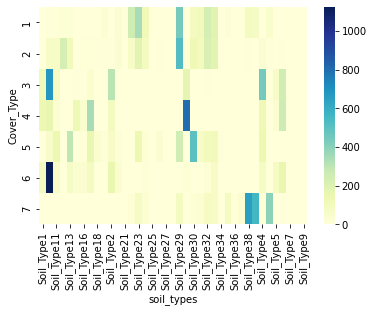

In [24]:
freq_table = pd.crosstab(df.Cover_Type, df.soil_types)
sns.heatmap(freq_table, cmap="YlGnBu")

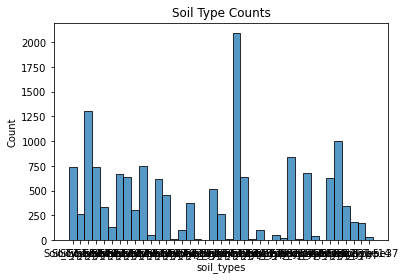

In [53]:
sns.histplot(df.soil_types).set(title="Soil Type Counts")
plt.xticks(rotation=90)
df.drop("soil_types", axis=1, inplace=True)

<AxesSubplot: >

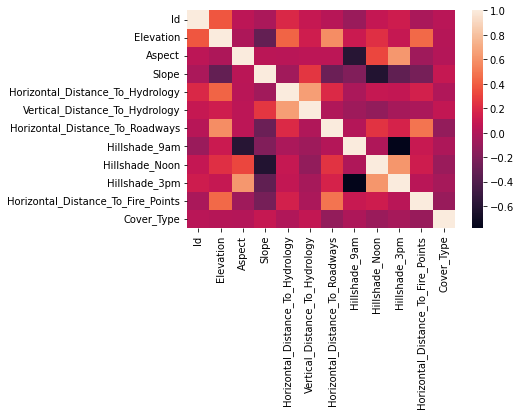

In [11]:
#correlation matrix between dependent variables
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns
sns.heatmap(df[numeric_cols].corr())

### Aspect Variable:
Aspect is measured in _degrees azimuth_.

The azimuth is the angle between North, measured clockwise around the observer's horizon, and a celestial body (sun, moon).

In [13]:
grouped = df.groupby("Cover_Type") 

pd.DataFrame({"mean":grouped["Aspect"].mean(),
               "std":grouped["Aspect"].std(),
               "mean/std":grouped["Aspect"].mean() / grouped["Aspect"].std()
               })

,mean,std,mean/std
Cover_Type,,,
1,155.886574,117.240246,1.329634
2,151.112500,108.654275,1.390764
3,173.583796,107.817029,1.609985
4,138.897685,87.484210,1.587689
5,138.058796,90.768030,1.521007
6,179.995833,132.967779,1.353680
7,153.306481,109.829269,1.395862


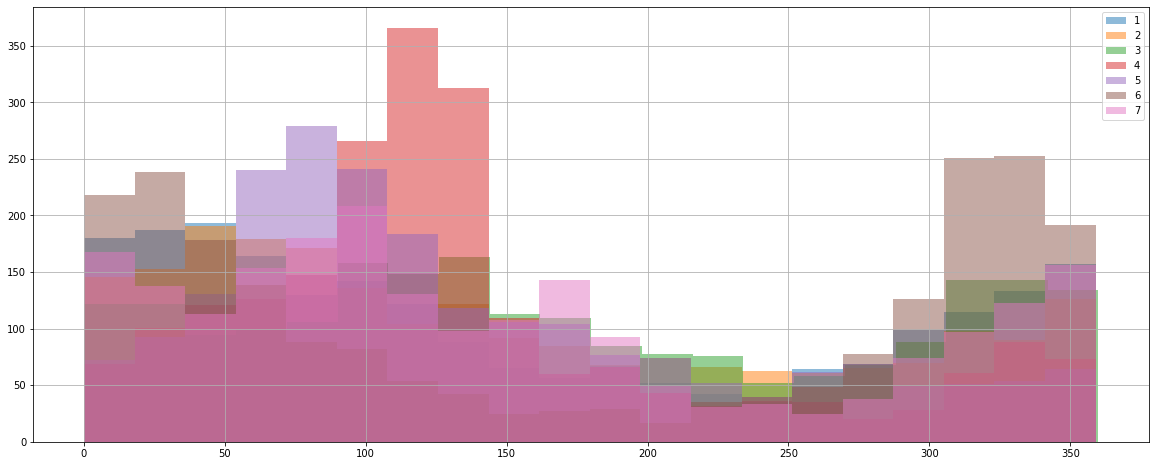

In [14]:
grouped["Aspect"].hist(alpha=0.5, figsize=(20,8), bins=20)
plt.legend(grouped.groups.keys())
plt.show()

## Encode data from soil type
In data description, there is data that is not available in the dataset that can be encoded. First digit of ELU represents climatic zone and second digit represents the geologic zone. We can do either of these two things: 
- Introduce two new categorical columns encoding this data by grouping all the variable with the same digits
- Encode this information in categorical variables somehow.

### Detailed approach:
If we can find a main feature specific to the climatic zones and geologic zones, we can encode this. This can be temperature or something else.
- one hot encode based on geologic and climatic zones, then differentiate between forests using the original categories. Or, don't differentiate if forest both geologic and climatic zone is the same.


### climatic zones:

https://en.wikipedia.org/wiki/Montane_ecosystems
 
- __Sierra Nevada lower montane forest -->__
Moving southward, the elevation range of the lower montane forest grows. Its elevation range at the northern end of the Sierra is from 1,200–5,500 feet (370–1,680 m). In the central Sierra, its elevation range is from 3,000–7,000 feet (910–2,130 m). In the southern end of the Sierra, its range is from 2,500–9,000 feet (760–2,740 m). __The daily high temperature in the summer is 80–90 °F (27–32 °C), while the daily lows in winter are around 28–34 °F (−2–1 °C)__. Annual precipitation depends on elevation: Yosemite Valley at 4,000 feet (1,200 m) gets 37 inches (940 mm) a year.

- __Bolivian montane dry forests -->__
Altitudes are from 360–700 metres (1,180–2,300 ft) above sea level. At a sample location at 18.75°S 65.25°W the Köppen climate classification is "Cwb": warm temperate, winter dry, warm summer. At this location the __mean monthly temperatures range from 13.5 °C (56.3 °F) in July to 18.8 °C (65.8 °F) in November__. Yearly total precipitation is about 580 millimetres (23 in). Average monthly precipitation is below 10 millimetres (0.39 in) in May–August, and rises to 137.4 millimetres (5.41 in) in January.

- __subalpine-->__
https://www.nps.gov/olym/learn/nature/subalpine-forests.htm#:~:text=The%20subalpine%20forest%20is%20a,too%20challenging%20for%20tree%20growth.

- __Northern transitional alpine forests-->__
It varies greatly in elevation from the heavily glacierized areas of the Hazelton and Skeena mountains between 2,500–2,800 m (8,200–9,200 ft), to the Nass and Skeena river valleys below 750 m (2,460 ft).
 In the west it has a warm humid continental climate (Köppen Dsb ) with warm summers and cold winters. In the east it has a subarctic climate (Köppen Dfc ) with cool summers and cold winters. Precipitation ranges from 2500mm (98.4 in) in the western coastal areas of the Nass River valley, to 600mm (23.6 in) in the lower elevations of the interior Bulkley Ranges. Temperature varies greatly with elevation, but averages around 13°C (55.4°F) in the summer and -9.5°C (14.9°F) in the winter.






In [15]:
climatic_zone = {
            "lower_montane_dry":[],
            "lower_montane":[1,2,3,4,5,6],
            "montane_dry":[7,8],
            "montane":[9,10,11,12,13],
            "montane_dry_and_montane":[14,15],
            "montane_and_subalpine":[16,17,18],
            "subalpine":list(range(19,35)),
            "alpine":[35,36,37,38,39,40]
                 }

geologic_zone = {
          "alluvium":[14,15,16,17,19,20,21],
          "glacial":[9,22,23],
          "shale":[],
          "sandstone":[],
          "mixed_sedimentary":[7,8],
          "unspecified":[], 
          "igneous_metamorphic":[item for sublist in [list((range(1,7))), list(range(10,14)), [18], list(range(24,41))] for item in sublist],
          "volcanic":[]
          }

#verify their length
length = 0
for i in climatic_zone.values():
     length += len(i)
if length != 40:
     print("length mismatch")
length = 0
for i in geologic_zone.values():
     length += len(i)
if length != 40:
     print("length mismatch")


In [32]:
#create new zones merging these 2 properties
import itertools
categories = list(itertools.product(climatic_zone.keys(),geologic_zone.keys()))  
categories = {k: [] for k in categories}

for cat in categories.keys():
  #print(cat[0],cat[1])
  clim = climatic_zone[cat[0]]
  geo = geologic_zone[cat[1]]
  for i in range(41):
    if i in clim and i in geo:
      categories[cat].append(i)


length = 0
for i in categories.values():
  length += len(i)
print(length)
categories_filt = {k: v for k, v in categories.items() if len(v) != 0}


#group soil_types based on numbers here
# Dictionary containing columns to be grouped
data = df.filter(regex="Soil_Type")

# Group the columns using the dictionary
#grouped_data = np.zeros((data.shape[0], len(categories_filt)))
grouped_data = pd.DataFrame()

for i, (group_name, group_cols) in enumerate(categories_filt.items()):
    
    col_names = [f"Soil_Type{i}" for i in group_cols]
    grouped_data[group_name] = data.loc[:, col_names].sum(axis=1)

#verify count of new data
print("must be same length as data: ", grouped_data.sum(axis=1).sum())

#df_alt = df.drop(columns=data.columns)
#df_alt = df_alt.join(grouped_data) 
df_alt = df.join(grouped_data)
display(df_alt)

40
must be same length as data:  15120


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,"(montane_dry, mixed_sedimentary)","(montane, glacial)","(montane, igneous_metamorphic)","(montane_dry_and_montane, alluvium)","(montane_and_subalpine, alluvium)","(montane_and_subalpine, igneous_metamorphic)","(subalpine, alluvium)","(subalpine, glacial)","(subalpine, igneous_metamorphic)","(alpine, igneous_metamorphic)"
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,1,0
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,1,0
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,1,0
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,1,0,0
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,...,0,0,0,0,0,0,0,0,0,1
15116,514378,3455,37,5,841,92,939,220,229,146,...,0,0,0,0,0,0,0,0,0,1
15117,368425,3279,90,14,404,113,1513,240,218,105,...,0,0,0,0,0,0,0,0,1,0
15118,537844,3589,357,9,418,52,1868,205,223,155,...,0,0,0,0,0,0,0,0,0,1


In [84]:
#Do the same transformation for test data

#group soil_types based on numbers here
# Dictionary containing columns to be grouped
data = df_test.filter(regex="Soil_Type")

# Group the columns using the dictionary
#grouped_data = np.zeros((data.shape[0], len(categories_filt)))
grouped_data = pd.DataFrame()

for i, (group_name, group_cols) in enumerate(categories_filt.items()):
    
    col_names = [f"Soil_Type{i}" for i in group_cols]
    grouped_data[group_name] = data.loc[:, col_names].sum(axis=1)

#verify count of new data
print("must be same length as data: ", grouped_data.sum(axis=1).sum())

#df_test_alt = df_test.drop(columns=data.columns)
#df_test_alt = df_test_alt.join(grouped_data) 
df_test_alt = df_test.join(grouped_data)
display(df_test_alt)

must be same length as data:  581012


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,"(montane_dry, mixed_sedimentary)","(montane, glacial)","(montane, igneous_metamorphic)","(montane_dry_and_montane, alluvium)","(montane_and_subalpine, alluvium)","(montane_and_subalpine, igneous_metamorphic)","(subalpine, alluvium)","(subalpine, glacial)","(subalpine, igneous_metamorphic)","(alpine, igneous_metamorphic)"
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,1,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,1,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,1,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,1,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
581008,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
581009,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
581010,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#fix feature names
cond = [(type(i) == tuple) for i in df_alt.columns]
cols_to_change = df_alt.columns[cond]
new_colnames = ["__".join(i) for i in cols_to_change]

col_dict = {k: v for k, v in zip(cols_to_change, new_colnames)}
df_alt = df_alt.rename(columns=col_dict)
df_test_alt = df_test_alt.rename(columns=col_dict)

##### For every newly identified region subgroup of geologic and climatic zone, compare the quantitative features:


In [78]:
#make all 11 categories into one category then group by this category
df_alt_expl = aggregate_one_hot(df_alt, regex_="__", new_colname="region_cat")

In [83]:
numeric_cols = df_alt_expl.select_dtypes(include=np.number)
numeric_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns

group = df_alt_expl.groupby("region_cat")

means = group[numeric_cols].mean()
means

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
region_cat,,,,,,,,,,,,
alpine__igneous_metamorphic,375977.920827,3373.461926,156.021684,14.198689,369.809884,73.374685,2698.512355,216.140696,221.289965,135.661120,1945.586989,6.249117
lower_montane__igneous_metamorphic,228179.164805,2365.565241,144.825661,19.604740,191.174612,59.377554,966.956960,223.226641,220.560610,120.133751,983.760283,3.985563
montane__glacial,124180.250000,2578.500000,64.000000,9.250000,136.250000,16.750000,796.000000,228.000000,224.250000,128.500000,799.500000,1.750000
montane__igneous_metamorphic,274141.554391,2516.757473,175.257319,19.673652,199.513405,53.583667,1269.140832,194.787982,209.261017,144.326040,1257.717411,4.338367
montane_and_subalpine__alluvium,181710.703753,2371.325737,173.269437,11.431635,64.301609,4.978552,1257.844504,209.714477,228.794906,153.010724,1287.378016,4.402145
montane_and_subalpine__igneous_metamorphic,17391.136364,2523.090909,101.000000,7.113636,149.636364,12.227273,776.681818,226.204545,230.090909,137.613636,5280.545455,4.522727
montane_dry__mixed_sedimentary,97406.666667,2913.666667,63.666667,5.000000,328.666667,5.000000,4879.666667,223.666667,231.000000,143.000000,3452.000000,1.333333
montane_dry_and_montane__alluvium,148718.052023,2210.023121,157.381503,13.289017,7.572254,1.722543,760.219653,210.797688,220.953757,142.953757,674.578035,4.462428
subalpine__alluvium,198972.805128,2854.317949,156.348718,9.620513,95.917949,7.835897,2610.015385,213.241026,227.933333,149.666667,2297.794872,2.907692


## Wilderness Areas
- 1 -- Rawah Wilderness Area
- 2 -- Neota Wilderness Area
- 3 -- Comanche Peak Wilderness Area
- 4 -- Cache la Poudre Wilderness Area

We can encode the coordinates (or some other external property from these areas) to the feature (average temperature?)

In [114]:
wilderness = df.filter(regex="Wilderness_Area")

# Get the column names of the original categorical variables
original_cols = wilderness.columns

# Get the names of the new categorical variables
new_cols = [int(i[15:]) for i in wilderness.columns]

# Create a dictionary to map the original column names to the new categorical variables
mapping_dict = {col: new_col for col, new_col in zip(original_cols, new_cols)}

# Apply the mapping to the dataframe
df['wilderness_area'] = wilderness.idxmax(axis=1).map(mapping_dict)

# Drop the dummy encoded variables
#df = df.drop(original_cols, axis=1)

In [115]:
df.wilderness_area.value_counts()

3    6302
4    4681
1    3568
2     569
Name: wilderness_area, dtype: int64

<AxesSubplot: xlabel='wilderness_area', ylabel='Cover_Type'>

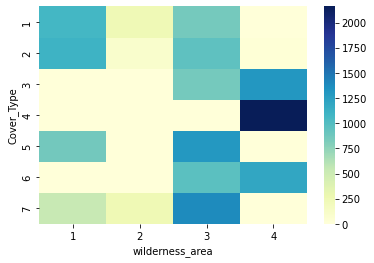

In [116]:
freq_table = pd.crosstab(df.Cover_Type, df.wilderness_area)
sns.heatmap(freq_table, cmap="YlGnBu")


### Wilderness Area vs Elevation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


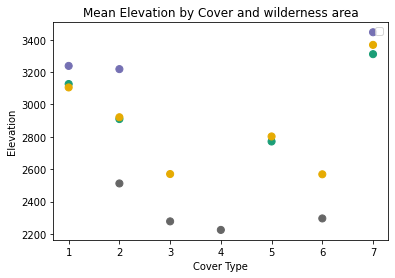

In [137]:
mean_by_cover_wilderness = df.groupby(["Cover_Type", "wilderness_area"])["Elevation"].mean()
d = mean_by_cover_wilderness.reset_index()
d
plt.scatter(y=d.Elevation, x=d.Cover_Type, c=d.wilderness_area, s=50, cmap=plt.cm.Dark2)
plt.xlabel("Cover Type")
plt.ylabel("Elevation")
plt.title("Mean Elevation by Cover and wilderness area")
plt.legend()

In [138]:
df.drop("wilderness_area", axis=1, inplace=True)

## Mutual information to look at non-linear relationships

In [44]:
df_alt.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [45]:
from sklearn.feature_selection import mutual_info_classif
to_drop = ["region_cat", "soil_types","Cover_Type"] 
mut_info = pd.Series(mutual_info_classif(df_alt.drop(to_drop, axis=1),df_alt["Cover_Type"]), 
                     index=df_alt.drop(to_drop, axis=1).columns)

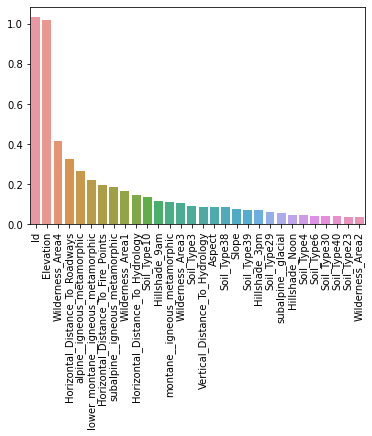

In [49]:
mut_info_com = mut_info.sort_values(ascending=False)[:30]
sns.barplot(x=mut_info_com.index, y=mut_info_com)
plt.xticks(rotation=90);


## Dummy Classification

In [54]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

X = df.copy()
y = X.pop("Cover_Type")

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestClassifier())
        ])    
cross_val_score(pipe,X, y, cv=5).mean()

0.8842592592592592

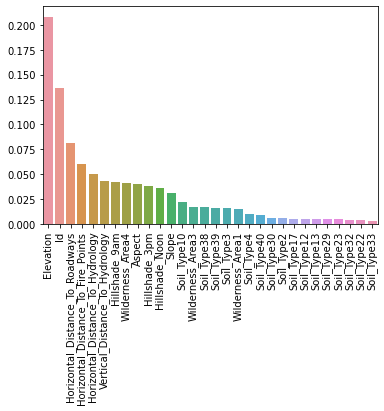

In [61]:
pipe.fit(X, y)
importances = pd.Series(pipe["model"].feature_importances_,
                index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:30].index, y=importances[:30])
plt.xticks(rotation=90);

In [68]:
#with alternative data
X = df_alt.copy()
y = X.pop("Cover_Type")
cross_val_score(pipe, X, y).mean()

0.8791666666666668

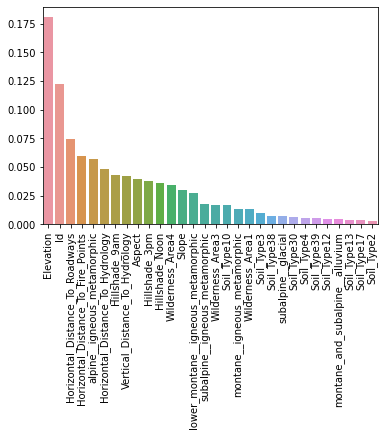

In [69]:
pipe.fit(X, y)
importances = pd.Series(pipe["model"].feature_importances_,
                index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:30].index, y=importances[:30])
plt.xticks(rotation=90);

In [98]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'deviance',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

X = df_alt.copy()
y = X.pop("Cover_Type")

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingClassifier(verbose=3, warm_start=True))
        ])

params = {
           #"model__learning_rate":[0.2, 0.3, 0.4],
           #"model__max_depth":[9,11],
           "model__learning_rate":[0.1, 0.2, 0.3],
           "model__max_depth":[7, 9, 11, 15, 17, 20],
           "model__max_features":[0.75, 0.6, "auto"],
           "model__min_samples_leaf":[4, 6, 8, 10, 12],
           "model__min_samples_split":[8, 10, 12, 14, 16, 18],
           "model__n_iter_no_change":  [20, 30, 40, 50],
           "model__min_impurity_decrease": [0.05 ,0.1,0.2,0.3]
        }


search2 = RandomizedSearchCV(pipe, params, n_iter=200,cv=3, n_jobs=2, verbose=-1) 

search2.fit(X, y)

print("best params: ", search2.best_params_)

y_pred = search2.predict(df_test)


      Iter       Train Loss   Remaining Time 
         1           1.4858           53.65s
         2           1.2096           53.38s
         3           1.0096           52.75s
         4           0.8553           52.26s
         5           0.7309           50.76s
         6           0.6316           50.68s
         7           0.5468           49.80s
         8           0.4764           49.25s
         9           0.4170           48.73s
        10           0.3665           47.94s
        11           0.3231           46.91s
        12           0.2871           46.12s
        13           0.2564           45.25s
        14           0.2305           44.38s
        15           0.2071           43.55s
        16           0.1867           42.80s
        17           0.1700           41.99s
        18           0.1551           41.04s
        19           0.1430           40.05s
        20           0.1320           39.28s
        21           0.1230           38.28s
        2

In [86]:
y_pred = search2.predict(df_test_alt)

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
df.columns[~df.columns.isin(df_test.columns)]

Index(['Cover_Type'], dtype='object')

In [88]:
y_pred_train = search2.predict(X)
np.mean(y_pred_train == y)

0.9857804232804233

In [91]:
#submission
sub = pd.read_csv("Data/full_submission.csv")
sub["Cover_Type"] = y_pred
sub.to_csv("submissions/submission8.csv", index=False)
sub

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,5
4,5,5
...,...,...
581007,581008,3
581008,581009,3
581009,581010,3
581010,581011,3


In [90]:
sub["Cover_Type"].value_counts()

2    243843
1    213265
3     37789
7     30797
5     27709
6     23712
4      3897
Name: Cover_Type, dtype: int64

##### Best parameters with df_alt

In [186]:
X = df_alt.copy()
y = X.pop("Cover_Type")

params = {
        'learning_rate': 0.2, 
        'max_depth': 15, 
        'max_features': 0.75, 
        'min_samples_leaf': 4, 
        'min_samples_split': 12
        }
        

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingClassifier(**params))
        ])

pipe.fit(X, y)
y_pred = pipe.predict(df_test_alt)


c:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [187]:
#submission
sub = pd.read_csv("Data/full_submission.csv")
sub["Cover_Type"] = y_pred
sub.to_csv("submission6.csv", index=False)
sub["Cover_Type"].value_counts()

2    252010
1    212885
3     37423
7     28996
5     23691
6     22293
4      3714
Name: Cover_Type, dtype: int64

# Tpot Predictions

In [55]:
import tpot
X = df.copy()
y = X.pop("Cover_Type")

model = tpot.TPOTClassifier(generations=5, population_size=10, cv=3, verbosity=3, n_jobs=3)
model.fit(X,y)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 l2 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.

Generation 1 - Current Pareto front scores:

-1	0.7292328042328041	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=21, KNeighborsClassifier__p=2, KNeighborsClassifier__weights=distance)

-2	0.784589947089947	ExtraTreesClassifier(SelectFwe(input_matrix, SelectFwe__alpha=0.049), ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.6000000000000001, ExtraTreesClassifier__min_samples_leaf=17, ExtraTreesClassifier__min_samples_split=18, ExtraTreesClassifier__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
_pre_test decorator: _random_mutation_operator: num_test=0 Invalid classes inferred from unique values of 

TPOTClassifier(cv=3, generations=5, n_jobs=3, population_size=10, verbosity=3)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))